In [88]:
import pandas as pd
df = pd.read_csv('data/score.csv', index_col='지원번호')

import matplotlib.pyplot as plt
#한글폰트 설정
plt.rc('font', family = 'Noto Sans KR')
plt.rc('font', size = 10)
plt.rc('axes', unicode_minus = False)

In [89]:
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,채치수,북산고,197,90,85,100,95,85,Python
2번,정대만,북산고,184,40,35,50,55,25,Java
3번,송태섭,북산고,168,80,75,70,80,75,Javascript
4번,서태웅,북산고,187,40,60,70,75,80,Java
5번,강백호,북산고,188,15,20,10,35,10,Java
6번,변덕규,능남고,202,80,100,95,85,80,C#
7번,황태산,능남고,188,55,65,45,40,35,Python
8번,윤대협,능남고,190,100,85,90,95,95,C#
9번,홍길동,산북고,185,100,85,90,95,95,C#


In [90]:
df.loc['3번','학교'] = '산북고'
df.loc['7번','학교'] = '남능고'

In [91]:
group = df.groupby('학교')['키'].mean()
group

학교
남능고    177.666667
능남고    196.000000
북산고    189.000000
산북고    174.500000
Name: 키, dtype: float64

In [92]:
school = group.index
height = group.values
school, height

(Index(['남능고', '능남고', '북산고', '산북고'], dtype='object', name='학교'),
 array([177.66666667, 196.        , 189.        , 174.5       ]))

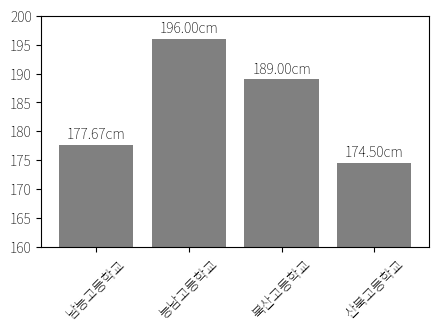

In [93]:
plt.figure(figsize=(5,3))
plt.bar(school, height, color='gray')
plt.ylim(160,200)
for idx, h in enumerate(height):
    plt.text(idx, h+1, f'{h:.2f}cm', ha='center')
plt.xticks(school, [s+'등학교' for s in school], rotation=45)
plt.show()

In [94]:
#학교별 학생수 막대그래프로 출력
group = df.groupby('학교').size()
group

학교
남능고    3
능남고    2
북산고    4
산북고    4
dtype: int64

In [95]:
school = group.index
students = group.values
school, students

(Index(['남능고', '능남고', '북산고', '산북고'], dtype='object', name='학교'),
 array([3, 2, 4, 4]))

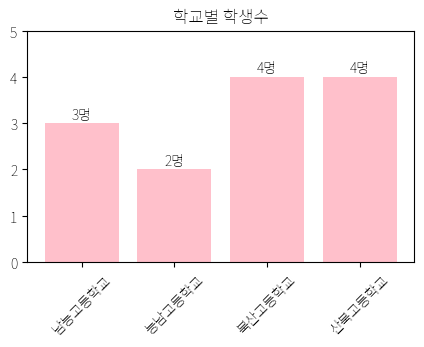

In [96]:
plt.figure(figsize=(5,3))
plt.title('학교별 학생수')
plt.bar(school, students, color='pink')
plt.ylim(0,5)
for idx, s in enumerate(students):
    plt.text(idx, s+0.1, f'{s}명', ha='center')
plt.xticks(school, [s+'등학교' for s in school], rotation=45)
plt.show()

In [97]:
df['SW특기'] = df['SW특기'].str.capitalize()
df.fillna({'SW특기':'없음'}, inplace=True)
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,채치수,북산고,197,90,85,100,95,85,Python
2번,정대만,북산고,184,40,35,50,55,25,Java
3번,송태섭,산북고,168,80,75,70,80,75,Javascript
4번,서태웅,북산고,187,40,60,70,75,80,Java
5번,강백호,북산고,188,15,20,10,35,10,Java
6번,변덕규,능남고,202,80,100,95,85,80,C#
7번,황태산,남능고,188,55,65,45,40,35,Python
8번,윤대협,능남고,190,100,85,90,95,95,C#
9번,홍길동,산북고,185,100,85,90,95,95,C#


In [98]:
group = df.groupby('SW특기').size() #size, count null값 들어가는지 체크*

In [99]:
sw = group.index
count = group.values
sw, count

(Index(['C#', 'Java', 'Javascript', 'Python'], dtype='object', name='SW특기'),
 array([3, 5, 1, 4]))

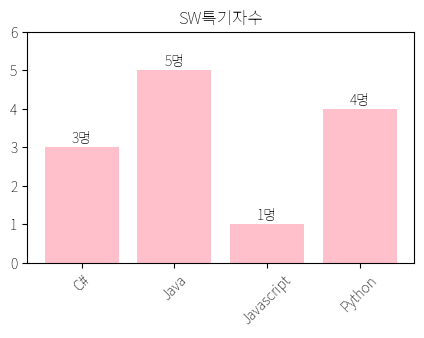

In [100]:
plt.figure(figsize=(5,3))
plt.title('SW특기자수')
plt.bar(sw, count, color='pink')
plt.ylim(0,max(count)+1)
plt.yticks([y for y in range(0,max(count)+2,1)])
for idx, c in enumerate(count):
    plt.text(idx, c+0.1, f'{c}명', ha='center')
plt.xticks(sw, rotation=45)
plt.show()

In [101]:
#학교별 평균점수
df['평균'] = df.apply(lambda row:row['국어':'사회'].mean(), axis=1)
avg=df['평균']
group = df.groupby('학교')['평균'].mean()
group
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기,평균
지원번호,,,,,,,,,,
1번,채치수,북산고,197,90,85,100,95,85,Python,91.0
2번,정대만,북산고,184,40,35,50,55,25,Java,41.0
3번,송태섭,산북고,168,80,75,70,80,75,Javascript,76.0
4번,서태웅,북산고,187,40,60,70,75,80,Java,65.0
5번,강백호,북산고,188,15,20,10,35,10,Java,18.0
6번,변덕규,능남고,202,80,100,95,85,80,C#,88.0
7번,황태산,남능고,188,55,65,45,40,35,Python,48.0
8번,윤대협,능남고,190,100,85,90,95,95,C#,93.0
9번,홍길동,산북고,185,100,85,90,95,95,C#,93.0


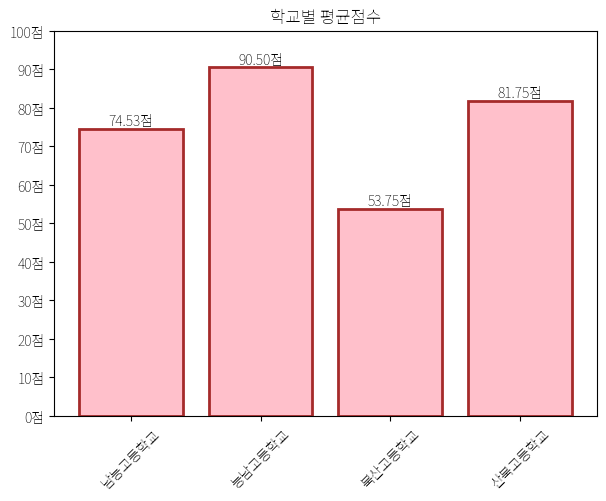

In [102]:
school = group.index
avg = group.values
plt.figure(figsize=(7,5))
plt.title('학교별 평균점수')
plt.bar(school,avg, color='pink', ec='brown', lw=2)
plt.ylim(0,100)
yticks = [y for y in range(0,101,10)]
plt.yticks(yticks, [f'{y}점' for y in yticks] )
for idx, a in enumerate(avg):
    plt.text(idx, a+1, f'{a:.2f}점', ha='center')
plt.xticks(school,[s+'등학교' for s in school], rotation=45)
plt.show()

In [103]:
#app에 추가할 데이터프레임 생성
#학생별 키 막대그래프

df = pd.read_csv('c:/python/04.데이터시각화/data/score.csv', index_col='지원번호')
df

import matplotlib.pyplot as plt
#한글폰트 설정
plt.rc('font', family = 'Noto Sans KR')
plt.rc('font', size = 10)
plt.rc('axes', unicode_minus = False)

In [104]:
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,채치수,북산고,197,90,85,100,95,85,Python
2번,정대만,북산고,184,40,35,50,55,25,Java
3번,송태섭,북산고,168,80,75,70,80,75,Javascript
4번,서태웅,북산고,187,40,60,70,75,80,Java
5번,강백호,북산고,188,15,20,10,35,10,Java
6번,변덕규,능남고,202,80,100,95,85,80,C#
7번,황태산,능남고,188,55,65,45,40,35,Python
8번,윤대협,능남고,190,100,85,90,95,95,C#
9번,홍길동,산북고,185,100,85,90,95,95,C#


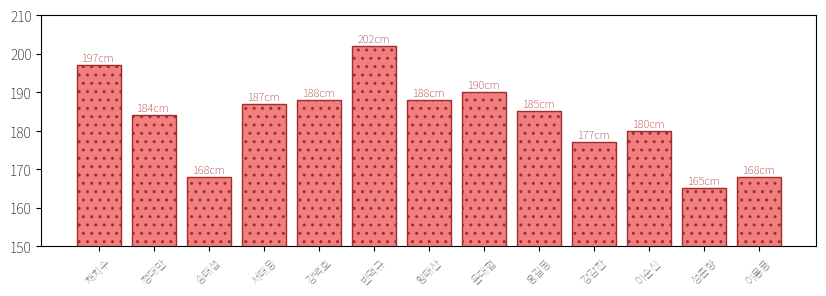

In [105]:
#학생별 평균키
name = df['이름']
height = df['키']
plt.figure(figsize=(10,3))
plt.ylim(150,210)
plt.bar(name, height, color='#F08080', ec= 'brown', hatch = '..')
plt.xticks(name, rotation=45, size=8, color='gray')
for idx, h in enumerate(height):
    plt.text(idx, h+1, f'{h}cm', ha='center', color='brown', size=8)
plt.show()

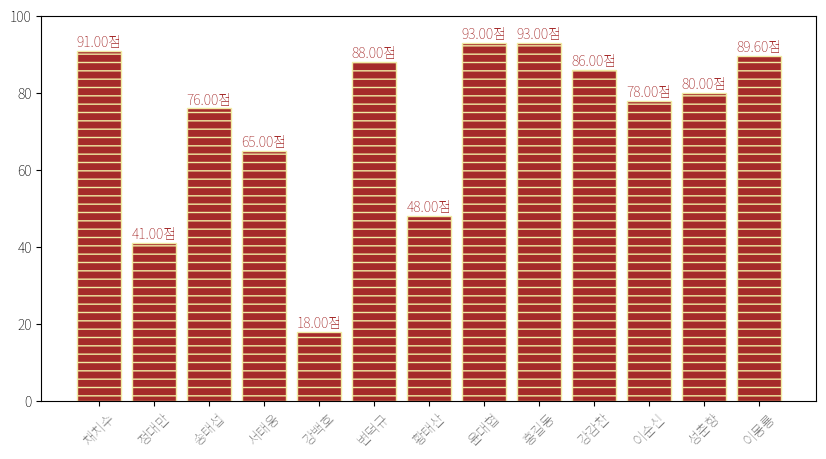

In [106]:
#학생별 평균 점수
df['평균'] = df.apply(lambda row:row['국어':'사회'].mean(), axis=1)
name = df['이름']
avg = df['평균']
plt.figure(figsize=(10,5))
plt.ylim(0,100)
plt.bar(name, avg, color='brown', ec= '#F0EBA3', hatch = '--')
plt.xticks(name, rotation=45, size=10, color='gray')
for idx, a in enumerate(avg):
    plt.text(idx, a+1, f'{a:.2f}점', ha='center', color='brown', size=10)
plt.show()

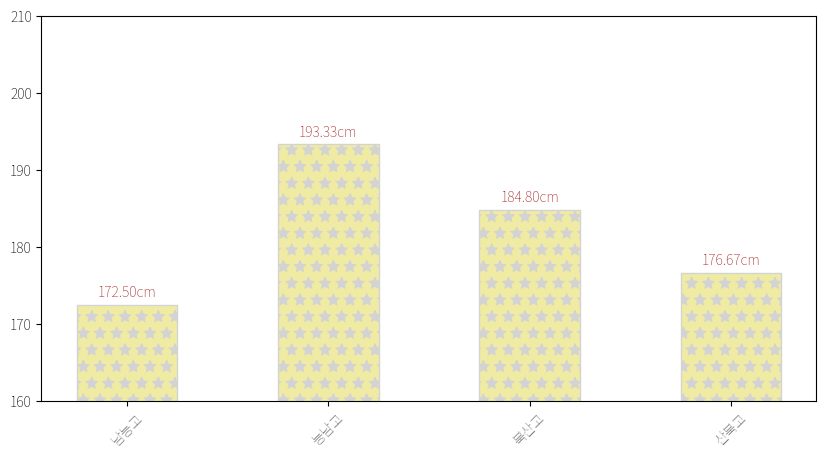

In [107]:
#학교별 평균키
group = df.groupby('학교')['키'].mean()
label = group.index
values = group.values
plt.figure(figsize=(10,5))
plt.ylim(160,210)
plt.bar(label, values, color='#F0EBA3', ec= '#D3D3D3', hatch = '*', width= 0.5)
plt.xticks(label, rotation=45, size=10, color='gray')
for idx, v in enumerate(values):
    plt.text(idx, v+1, f'{v:.2f}cm', ha='center', color='brown', size=10)

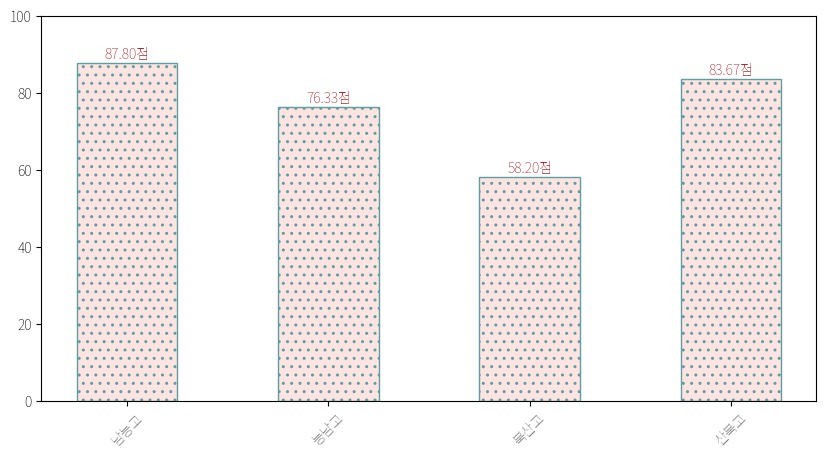

In [108]:
#학교별 평균점수
group = df.groupby('학교')['평균'].mean()
label = group.index
values = group.values
plt.figure(figsize=(10,5))
plt.ylim(0,100)
plt.bar(label, values, color='#FFE4E1', ec= '#5F9EA0', hatch = '..', width= 0.5)
plt.xticks(label, rotation=45, size=10, color='gray')
for idx, v in enumerate(values):
    plt.text(idx, v+1, f'{v:.2f}점', ha='center', color='brown', size=10)

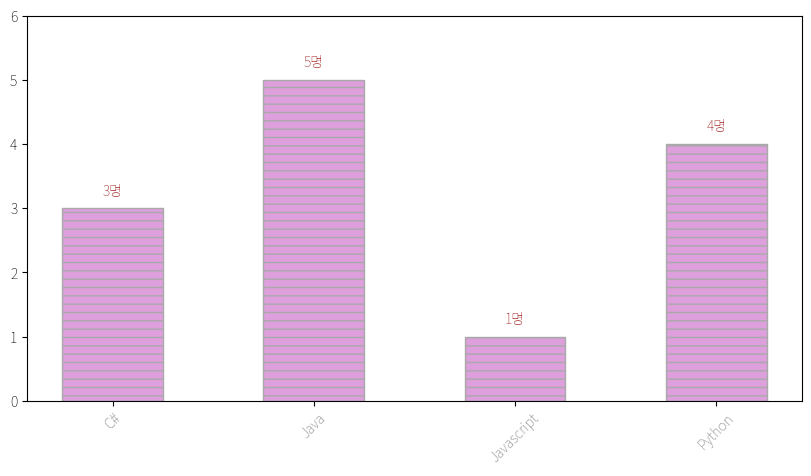

In [109]:
#SW특기자수
df['SW특기'] = df['SW특기'].str.capitalize()
group = df.groupby('SW특기').size()
label = group.index
values = group.values
plt.figure(figsize=(10,5))
plt.ylim(0,max(values)+1)
plt.bar(label, values, color='#DDA0DD', ec= '#A9A9A9', hatch = '--', width= 0.5)
plt.xticks(label, rotation=45, size=10, color='gray')
for idx, v in enumerate(values):
    plt.text(idx, v+0.2, f'{v}명', ha='center', color='brown', size=10)

In [110]:
#학사관리 data 시각화
#학생별(이름)-평균점수 데이터 전처리
enroll = pd.read_csv('c:/python/04.데이터시각화/data/수강.csv')
group = enroll.groupby('학생번호')['점수'].mean().to_frame()
stu = pd.read_csv('c:/python/04.데이터시각화/data/학생.csv')
merge = stu.merge(group,how='left',on='학생번호')
merge.fillna(0, inplace=True)

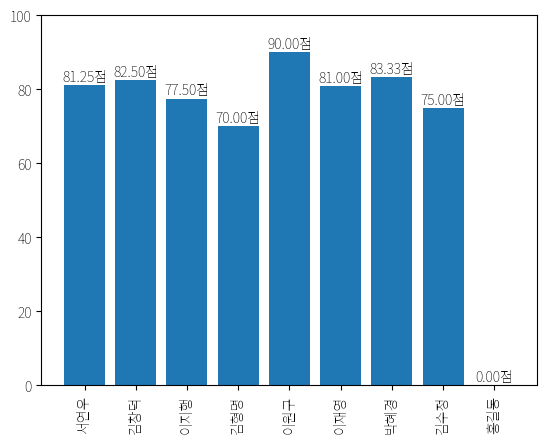

In [111]:
#학생별 평균점수 막대그래프화
plt.bar(merge['학생이름'], merge['점수'])
# xticks = [ x for idx, x in enumerate(merge)]
# xticks
# # plt.xticks(merge['학생이름'],[x['학생이름']+x['학생번호'] for x in merge])
plt.ylim(0,100)
for idx, grade in enumerate(merge['점수']):
    plt.text(idx, grade+1, f'{grade:.2f}점', ha='center')
plt.xticks(merge['학생이름'],rotation=90)
plt.show()

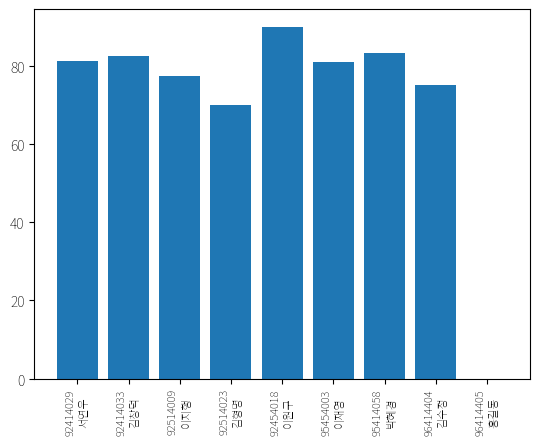

In [112]:
nos = merge['학생번호']
names = merge['학생이름']
grades = merge['점수']
xticks = [f'{nos[idx]}\n{names[idx]}' for idx, x in enumerate(nos)]
plt.bar(names, grades)
plt.xticks(names, labels=xticks, rotation=90, size=8)
plt.show()

In [113]:
#강좌별(이름) 평균 막대그래프-데이터 전처리
enroll = pd.read_csv('c:/python/04.데이터시각화/data/수강.csv')
group = enroll.groupby('강좌번호')['점수'].mean().to_frame()
cou = pd.read_csv('c:/python/04.데이터시각화/data/강좌.csv')
merge =cou.merge(group,how='left',on='강좌번호')
merge.fillna(0, inplace=True)
merge


,강좌번호,강좌이름,강의시수,강의실,담당교수,최대인원,점수
0,C301,파일처리론,3,506,221,100,76.333333
1,C401,데이터베이스,3,414,221,80,85.000000
2,C421,알고리즘,3,510,228,80,75.000000
3,C312,자료구조,2,510,228,100,80.000000
4,E221,논리회로,3,304,311,100,81.250000
5,A109,한국의건축문화,2,101,509,120,87.500000
6,A108,건축학개론,2,101,509,120,0.000000


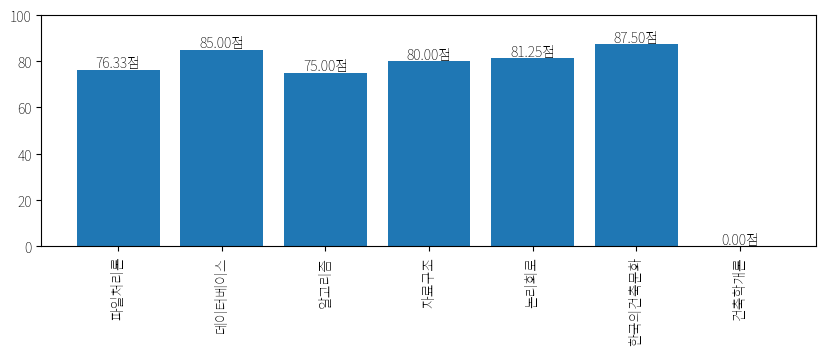

In [ ]:
#학생별 평균점수 막대그래프화
plt.figure(figsize=(10,3))
plt.bar(merge['강좌이름'], merge['점수'])
plt.ylim(0,100)
for idx, grade in enumerate(merge['점수']):
    plt.text(idx, grade+1, f'{grade:.2f}점', ha='center')
plt.xticks(merge['강좌이름'],rotation=90)
plt.show()

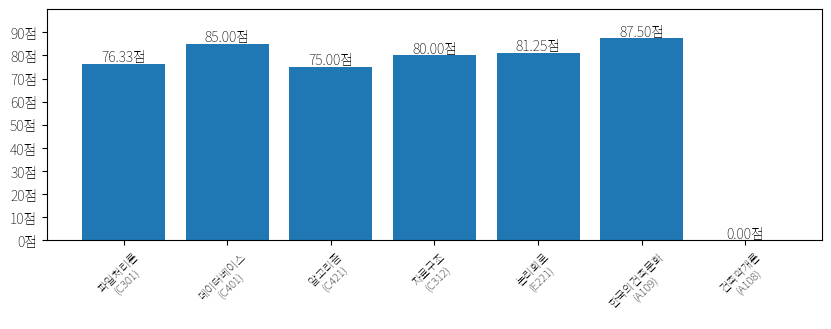

In [136]:
nos = merge['강좌번호']
names = merge['강좌이름']
grades = merge['점수']
xticks = [f'{names[idx]}\n({nos[idx]})' for idx, x in enumerate(nos)]
plt.figure(figsize=(10,3))
plt.ylim(0,100)
plt.bar(names, grades)
plt.xticks(names, xticks, rotation=45, size=8)
for idx, grade in enumerate(merge['점수']):
    plt.text(idx, grades[idx]+1, f'{grade:.2f}점', ha='center')
yticks = [y for y in range(0,100,10)]
plt.yticks(yticks, [f'{y}점' for y in yticks])
plt.show()